Data Preprocessing

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("sobar-72.csv")
print(df.head())

   behavior_sexualRisk  behavior_eating  behavior_personalHygine  \
0                   10               13                       12   
1                   10               11                       11   
2                   10               15                        3   
3                   10               11                       10   
4                    8               11                        7   

   intention_aggregation  intention_commitment  attitude_consistency  \
0                      4                     7                     9   
1                     10                    14                     7   
2                      2                    14                     8   
3                     10                    15                     7   
4                      8                    10                     7   

   attitude_spontaneity  norm_significantPerson  norm_fulfillment  \
0                    10                       1                 8   
1                   

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   behavior_sexualRisk         72 non-null     int64
 1   behavior_eating             72 non-null     int64
 2   behavior_personalHygine     72 non-null     int64
 3   intention_aggregation       72 non-null     int64
 4   intention_commitment        72 non-null     int64
 5   attitude_consistency        72 non-null     int64
 6   attitude_spontaneity        72 non-null     int64
 7   norm_significantPerson      72 non-null     int64
 8   norm_fulfillment            72 non-null     int64
 9   perception_vulnerability    72 non-null     int64
 10  perception_severity         72 non-null     int64
 11  motivation_strength         72 non-null     int64
 12  motivation_willingness      72 non-null     int64
 13  socialSupport_emotionality  72 non-null     int64
 14  socialSuppor

Create empowerment_score by summing related columns

In [5]:
df['empowerment_score'] = df[['empowerment_knowledge', 'empowerment_abilities', 'empowerment_desires']].sum(axis=1)
df['socialSupport_score'] = df[['socialSupport_emotionality', 'socialSupport_appreciation', 'socialSupport_instrumental']].sum(axis=1)
df['motivation_score'] = df[['motivation_strength', 'motivation_willingness']].sum(axis=1)

In [7]:
df.drop(
    ['empowerment_knowledge', 'empowerment_abilities', 'empowerment_desires', 'socialSupport_emotionality', 'socialSupport_appreciation', 'socialSupport_instrumental','motivation_strength', 'motivation_willingness'], axis=1,inplace=True)

In [8]:
print(df[['empowerment_score']].describe())

       empowerment_score
count          72.000000
mean           30.138889
std            11.988616
min             9.000000
25%            20.750000
50%            32.000000
75%            40.000000
max            45.000000


In [9]:
print(df[['motivation_score']].describe())

       motivation_score
count         72.000000
mean          22.347222
std            6.160208
min            6.000000
25%           19.750000
50%           23.500000
75%           28.000000
max           30.000000


In [10]:
print(df[['socialSupport_score']].describe())

       socialSupport_score
count            72.000000
mean             24.638889
std              10.192935
min               8.000000
25%              16.000000
50%              25.500000
75%              34.000000
max              40.000000


Check & Handle Class Imbalance

In [11]:
# 1. Examine counts of the target classes
print(df['ca_cervix'].value_counts())
# 2. Separate features (X) and target (y)
X = df.drop('ca_cervix', axis=1)
y = df['ca_cervix']

ca_cervix
0    51
1    21
Name: count, dtype: int64


If the minority class is < ~40% of the data, we’ll rebalance with SMOTE in a later step, basically tell that guy to generate a better dataset

1.4 Normalize Features

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
# 1. Instantiate a Min-Max scaler (scales each feature to [0,1])
scaler = MinMaxScaler()

In [14]:
# 2. Fit the scaler on X and transform
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# 3. Quick check: all feature mins should be 0, maxes 1
print(X_scaled.describe().loc[['min','max']])

     behavior_sexualRisk  behavior_eating  behavior_personalHygine  \
min                  0.0              0.0                      0.0   
max                  1.0              1.0                      1.0   

     intention_aggregation  intention_commitment  attitude_consistency  \
min                    0.0                   0.0                   0.0   
max                    1.0                   1.0                   1.0   

     attitude_spontaneity  norm_significantPerson  norm_fulfillment  \
min                   0.0                     0.0               0.0   
max                   1.0                     1.0               1.0   

     perception_vulnerability  perception_severity  empowerment_score  \
min                       0.0                  0.0                0.0   
max                       1.0                  1.0                1.0   

     socialSupport_score  motivation_score  
min                  0.0               0.0  
max                  1.0               1.0

2. Exploratory Data Analysis (EDA)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

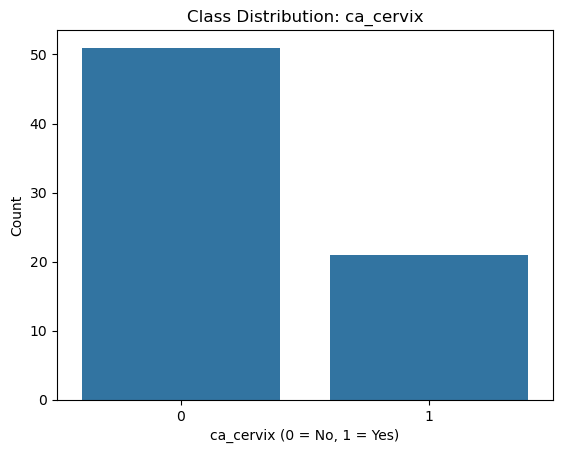

In [22]:
sns.countplot(x=y)
plt.title('Class Distribution: ca_cervix')
plt.xlabel('ca_cervix (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

Correlation Heatmap

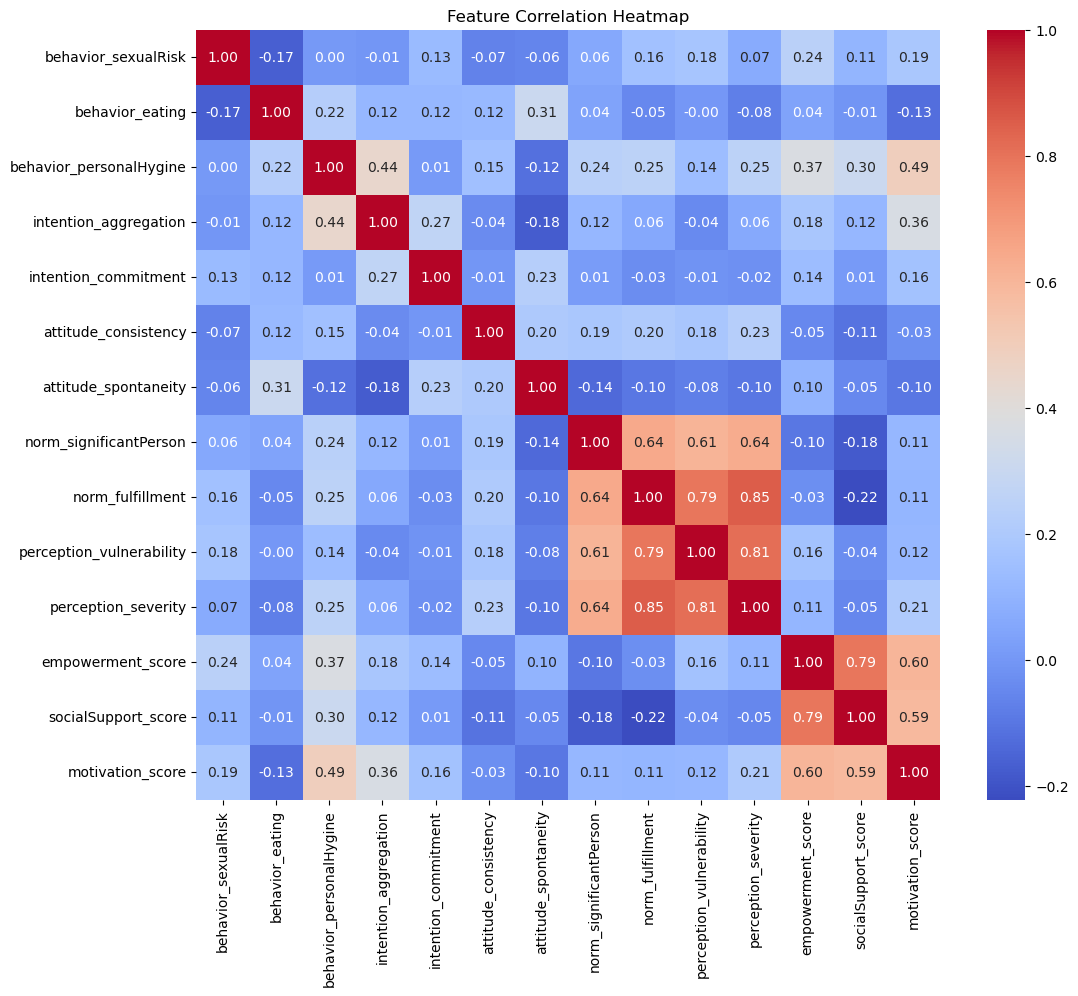

In [23]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_scaled.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Multicollinearity Check (VIF)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [26]:
X_const = add_constant(X_scaled)

In [27]:
vif = pd.DataFrame({'feature': X_scaled.columns, 'VIF': [variance_inflation_factor(X_const.values, i + 1) for i in range(len(X_scaled.columns))]})

In [28]:
print(vif.sort_values('VIF', ascending=False))

                     feature       VIF
8           norm_fulfillment  5.577532
10       perception_severity  5.286494
9   perception_vulnerability  4.251446
11         empowerment_score  4.120737
12       socialSupport_score  3.723253
13          motivation_score  2.382124
7     norm_significantPerson  2.080788
2    behavior_personalHygine  2.048284
3      intention_aggregation  1.562131
6       attitude_spontaneity  1.482560
1            behavior_eating  1.422784
4       intention_commitment  1.271836
0        behavior_sexualRisk  1.261717
5       attitude_consistency  1.183241


Model Development: Logistic Regression

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y,random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

 Evaluate the Model

In [34]:
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score)

In [35]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [36]:
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_proba):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy:  0.8667
ROC AUC:   0.9545
Confusion Matrix:
 [[10  1]
 [ 1  3]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9091    0.9091    0.9091        11
           1     0.7500    0.7500    0.7500         4

    accuracy                         0.8667        15
   macro avg     0.8295    0.8295    0.8295        15
weighted avg     0.8667    0.8667    0.8667        15



Interpret Feature Importance

In [37]:
coef_df = pd.DataFrame({'feature': X_scaled.columns, 'coefficient': model.coef_[0]}).sort_values('coefficient', ascending=False)

In [38]:
print(coef_df)

                     feature  coefficient
5       attitude_consistency     0.494952
1            behavior_eating     0.414915
6       attitude_spontaneity     0.360610
0        behavior_sexualRisk    -0.426577
8           norm_fulfillment    -0.608895
2    behavior_personalHygine    -0.640595
3      intention_aggregation    -0.692960
12       socialSupport_score    -0.706582
7     norm_significantPerson    -0.797558
9   perception_vulnerability    -0.892729
4       intention_commitment    -0.981943
13          motivation_score    -1.029231
10       perception_severity    -1.173067
11         empowerment_score    -1.656991
